In [1]:
# 📊 Sales Performance Dashboard (Jupyter Notebook)

import pandas as pd
import plotly.express as px

# Load Data
df = pd.read_csv('mock_sales_data.csv', parse_dates=['Order Date'])
df.head()


/Users/binduprabhu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Order ID,Order Date,Region,Category,Product,Units Sold,Unit Price,Revenue,Profit
0,ORD1466,2023-05-02,East,Electronics,Tablet,11,784.10,8625.10,1718.23
1,ORD1769,2023-11-05,East,Clothing,Jacket,4,160.01,640.04,136.15
2,ORD7396,2023-11-10,West,Furniture,Chair,2,198.19,396.38,37.99
3,ORD1189,2023-09-28,West,Electronics,Laptop,10,65.73,657.30,192.88
4,ORD4556,2023-05-11,South,Clothing,Jeans,19,394.81,7501.39,2218.97


In [2]:
# KPIs
total_sales = df['Revenue'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print(f"Total Sales: €{total_sales:,.2f}")
print(f"Total Profit: €{total_profit:,.2f}")
print(f"Total Orders: {total_orders}")


Total Sales: €2,413,729.46
Total Profit: €424,787.62
Total Orders: 489


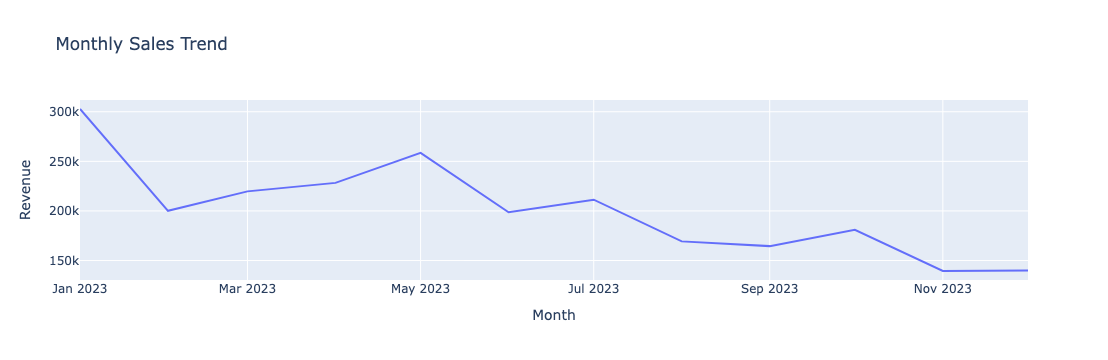

In [3]:
# Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()

fig = px.line(monthly_sales, x='Month', y='Revenue', title='Monthly Sales Trend')
fig.show()


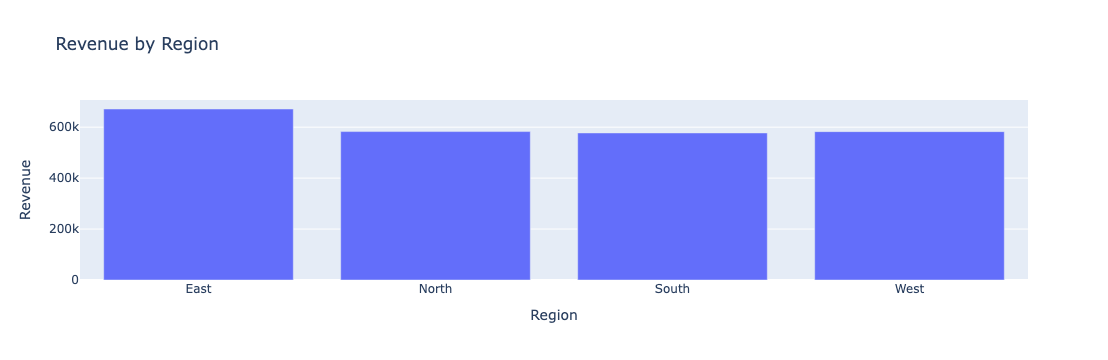

In [4]:
# Revenue by Region
region_sales = df.groupby('Region')['Revenue'].sum().reset_index()

fig = px.bar(region_sales, x='Region', y='Revenue', title='Revenue by Region')
fig.show()


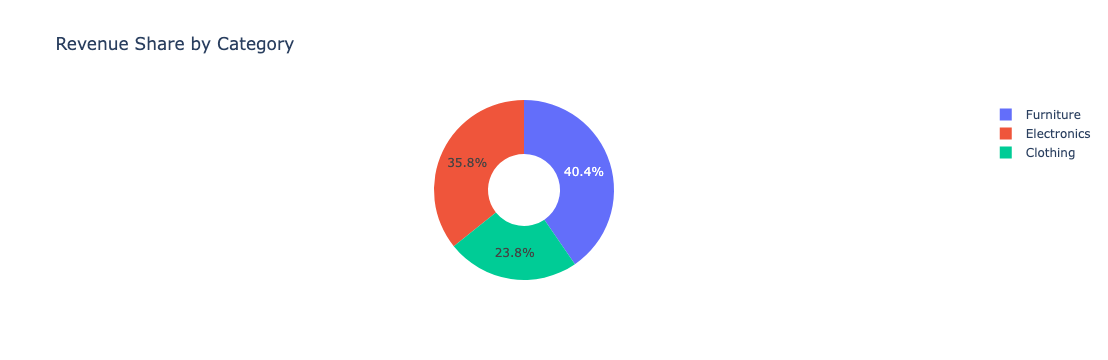

In [5]:
# Revenue Share by Category
category_sales = df.groupby('Category')['Revenue'].sum().reset_index()

fig = px.pie(category_sales, values='Revenue', names='Category', title='Revenue Share by Category', hole=0.4)
fig.show()


In [6]:
# Top Products by Revenue
product_sales = df.groupby('Product')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

product_sales.head(10)


,Product,Revenue
2,Couch,272882.53
1,Chair,249370.84
8,Laptop,241700.37
5,Headphones,240038.61
0,Bookshelf,237780.17
3,Desk,215566.39
11,Tablet,211052.20
4,Dress,183948.66
9,Smartphone,170200.36
7,Jeans,138652.22
